In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
# Paths to timings data
fenics_timings = "/home/cecile/dev/fenics-networks/applications/fenics/plot_perf_jump_vectors/timings_lm_jump_vectors.txt"
fenicsx_timings = "/home/cecile/dev/networks_fenicsx/demos/demo_perf_jump_vectors/timings_jump_vectors.txt"

In [11]:
# Translate timings table into dictionnaries
df_fenics = pd.read_csv(fenics_timings, sep = "\t", index_col=0, header=0)
df_fenicsx = pd.read_csv(fenicsx_timings, sep = "\t", index_col=0)
fenics_dict = df_fenics.to_dict()
fenicsx_dict = df_fenicsx.to_dict()
#print("fenics_dict = ", fenics_dict)

In [12]:
def n_dict(d: dict):
    new_dict = dict()
    for i,n in enumerate(list(d["forms"].keys())):
        new_dict[n] = dict()
        for key in list(d.keys()):
            new_dict[n][key] = list(d[key].values())[i]
    return new_dict

In [13]:
# Transform initial dictionnary into {n: {forms: x, assembly: x, solve: x}, ... }
fenics_n_dict = n_dict(fenics_dict)
fenicsx_n_dict = n_dict(fenicsx_dict)
#print("fenics_n_dict = ", fenics_n_dict)
#print("fenicsx_n_dict = ", fenicsx_n_dict)

n =  2.0
forms : 0.7 x faster
assembly : 3966.5 x faster
n =  3.0
forms : 0.6 x faster
assembly : 3421.4 x faster
n =  4.0
forms : 0.6 x faster
assembly : 2430.1 x faster
n =  5.0
forms : 0.6 x faster
assembly : 1023.2 x faster
n =  6.0
forms : 0.6 x faster
assembly : 133.3 x faster


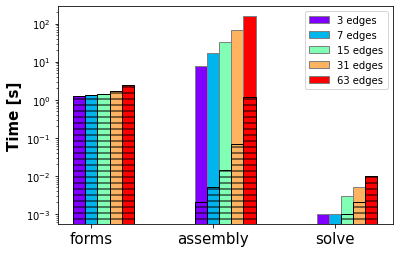

In [14]:
# Bar plots

barWidth = 0.1

# Set position of bar on X axis
first_key = list(fenics_n_dict.keys())[0]
br = np.arange(len(fenics_n_dict[first_key].keys()))
br = [x - barWidth for x in br]
# print("br = ", br)

# Make the plot
color = iter(plt.cm.rainbow(np.linspace(0, 1, len(list(fenics_n_dict.keys())))))
fig, ax = plt.subplots()
ax.set_yscale('log')

n_edges = 1
for i,key in enumerate(list(fenics_n_dict.keys())):
    n_edges += int(pow(2,key-1))
    c = next(color)
    # print("fenics_n_dict[", key, "].values() = ", fenics_n_dict[key].values())
    # print("fenicsx_n_dict[", key, "].values() = ", fenicsx_n_dict[key].values())
    ax.bar(br, fenics_n_dict[key].values(), color=c, width=barWidth, 
           edgecolor='grey', label=str(n_edges) + " edges")
    ax.bar(br, fenicsx_n_dict[key].values(), color=c, width=barWidth, 
           edgecolor='black', hatch='--')
    br = [x + barWidth for x in br]
    
    # Compute how much faster
    forms_gain = list(fenics_n_dict[key].values())[0]/list(fenicsx_n_dict[key].values())[0]
    assembly_gain = list(fenics_n_dict[key].values())[1]/list(fenicsx_n_dict[key].values())[1]
    print("n = ", key)
    print("forms : %.1f x faster" % forms_gain)
    print("assembly : %.1f x faster" % assembly_gain)

# Adding labels / ticks
xlabels = ["forms", "assembly", "solve"]
ax.set_ylabel('Time [s]', fontweight='bold', fontsize=15)
ax.set_xticks(range(len(br)))
ax.set_xticklabels(xlabels, fontsize=15)
ax.legend()

plt.savefig("/home/cecile/dev/networks_fenicsx/demos/demo_perf/timings_comp.png",
            facecolor='white',
            transparent=False,
            dpi=300,
            format="png")

